<h2>Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from scipy import stats
import copy

/Users/abhishikta/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<h2>Data Preparation

## About Data 

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-anginal pain, 4 asymptomatic (Nominal)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>

In [2]:
data_raw = pd.read_csv('/Users/abhishikta/Documents/Courses/ECE225A/Heart-Disease-Prediction-Using-Machine-Learning-Ensemble-master/heart_statlog_cleveland_hungary_final.csv')

In [3]:
#Renaming the columns
data_raw.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [4]:
data = copy.deepcopy(data_raw)

## Feature Guide
This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-anginal pain, 4 asymptomatic (Nominal)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>


**TARGET = 1:** Patient is at a risk of heart disease <br>
**TARGET = 0:** Patient is not at risk 


In [5]:
# Convert numeric values to categorical values
data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
data.loc[data['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
data.loc[data['chest_pain_type'] == 3, 'chest_pain_type'] = 'non-anginal pain'
data.loc[data['chest_pain_type'] == 4, 'chest_pain_type'] = 'asymptomatic'

data.loc[data['rest_ecg'] == 0, 'rest_ecg'] = 'normal'
data.loc[data['rest_ecg'] == 1, 'rest_ecg'] = 'ST-T wave abnormality'
data.loc[data['rest_ecg'] == 2, 'rest_ecg'] = 'left ventricular hypertrophy'

data.loc[data['st_slope'] == 1, 'st_slope'] = 'upsloping'
data.loc[data['st_slope'] == 2, 'st_slope'] = 'flat'
data.loc[data['st_slope'] == 3, 'st_slope'] = 'downsloping'

data['sex'] = data['sex'].apply(lambda x: 'male' if x == 1 else 'female')

/var/folders/n8/jb1m7_7x4bbbt72jw4hwgzpw0000gn/T/ipykernel_36703/2180726350.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'typical angina' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
/var/folders/n8/jb1m7_7x4bbbt72jw4hwgzpw0000gn/T/ipykernel_36703/2180726350.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'normal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['rest_ecg'] == 0, 'rest_ecg'] = 'normal'
/var/folders/n8/jb1m7_7x4bbbt72jw4hwgzpw0000gn/T/ipykernel_36703/2180726350.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'upsloping' has dtype incompatibl

In [6]:
#Check for missing values
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [7]:
#Visualise data
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


<h2> Data Analysis

In [8]:
print("Total number of records: ",data.shape[0])

Total number of records:  1190


<h3>1. Age-wise and Gender-wise distribution

/var/folders/n8/jb1m7_7x4bbbt72jw4hwgzpw0000gn/T/ipykernel_36703/1674242807.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=no_risk, palette='viridis', ax=axes[1])


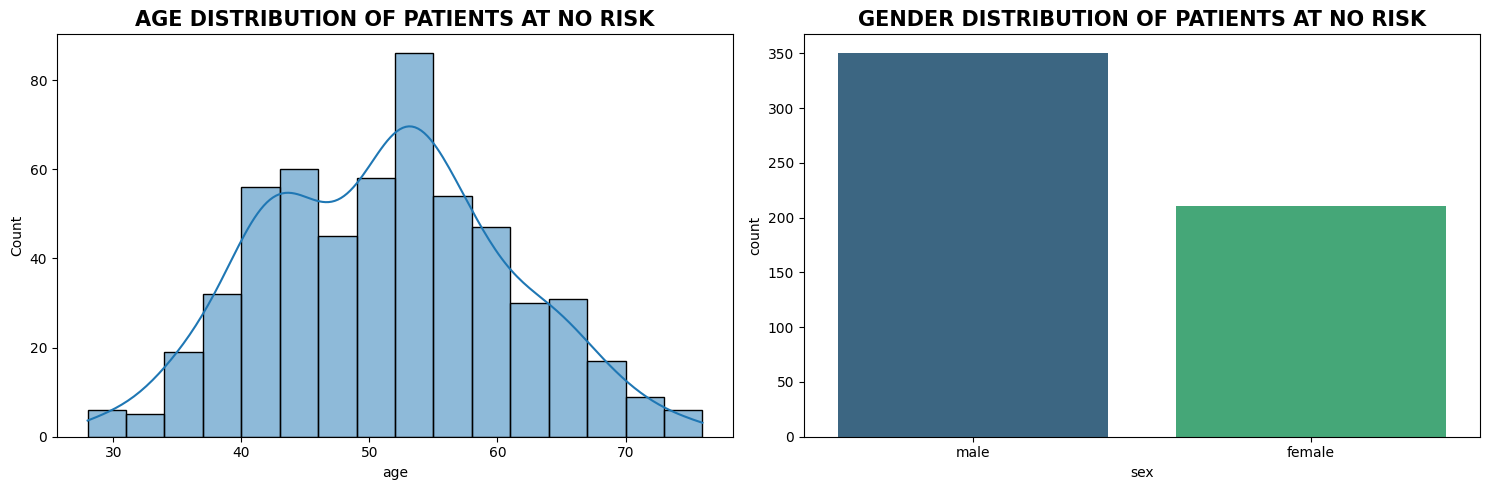

/var/folders/n8/jb1m7_7x4bbbt72jw4hwgzpw0000gn/T/ipykernel_36703/1674242807.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=risk, palette='viridis', ax=axes[1])


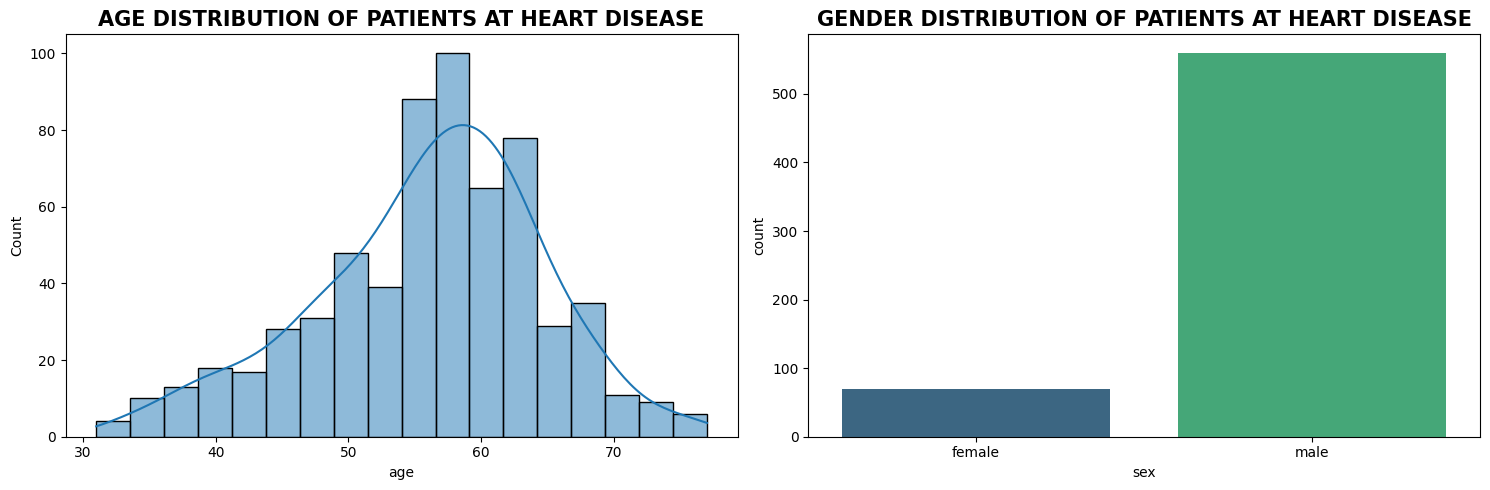

In [9]:
risk = data[data['target'] == 1]
no_risk = data[data['target'] == 0]

# Plotting normal patients
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(no_risk['age'], kde=True, ax=axes[0])
axes[0].set_title('AGE DISTRIBUTION OF PATIENTS AT NO RISK', fontsize=15, weight='bold')

sns.countplot(x='sex', data=no_risk, palette='viridis', ax=axes[1])
axes[1].set_title('GENDER DISTRIBUTION OF PATIENTS AT NO RISK', fontsize=15, weight='bold')

plt.tight_layout()
plt.show()

# Plotting heart disease patients
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(risk['age'], kde=True, ax=axes[0])
axes[0].set_title('AGE DISTRIBUTION OF PATIENTS AT HEART DISEASE', fontsize=15, weight='bold')

sns.countplot(x='sex', data=risk, palette='viridis', ax=axes[1])
axes[1].set_title('GENDER DISTRIBUTION OF PATIENTS AT HEART DISEASE', fontsize=15, weight='bold')

plt.tight_layout()
plt.show()

<h4> Inference:

- Patients at risk for heart disease (target = 1) tend to have a slightly older age distribution compared to those at no risk.
- Gender distribution shows a higher prevalence of heart disease in males compared to females.

<h3> 2. Cholestrol and Resting Blood Pressure Distribution

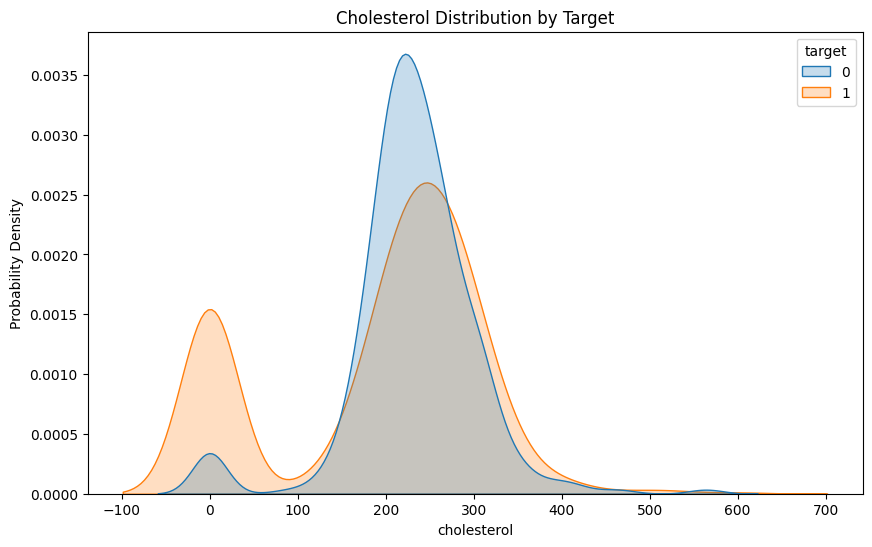

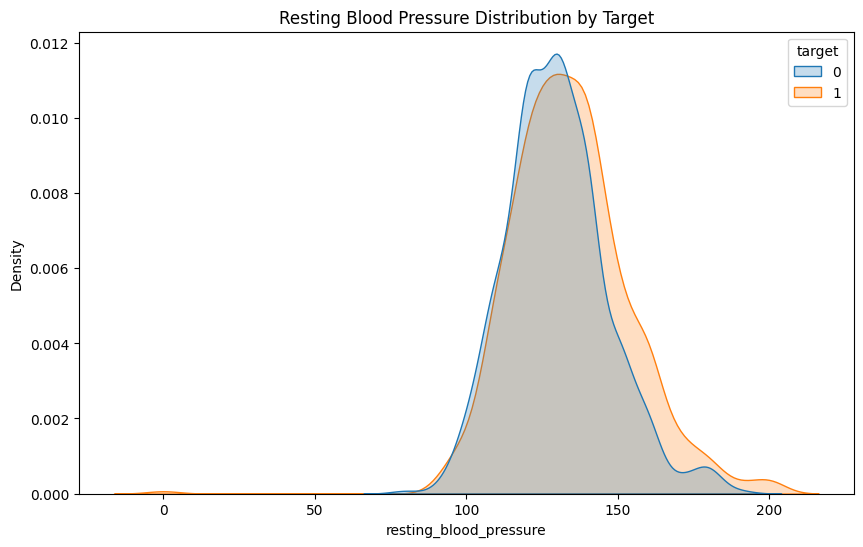

In [10]:
from scipy.cluster import hierarchy
from mpl_toolkits.mplot3d import Axes3D
# 2. Health Metric Analysis
# Cholesterol & Blood Pressure Trends
plt.figure(figsize=(10,6))
sns.kdeplot(data, x='cholesterol', hue='target', fill=True)
plt.title('Cholesterol Distribution by Target')
plt.ylabel('Probability Density')
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(data, x='resting_blood_pressure', hue='target', fill=True)
plt.title('Resting Blood Pressure Distribution by Target')
plt.show()


<h4> Inference:

- Higher cholesterol levels are more common among patients at risk of heart disease, as shown by the density plot.
- Resting blood pressure exhibits significant overlap between the target classes, suggesting it might be less discriminative as a standalone feature.

<h3> 3. Interaction between ST Correlation and Max Heart Rate Interaction

/var/folders/n8/jb1m7_7x4bbbt72jw4hwgzpw0000gn/T/ipykernel_36703/1710316041.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


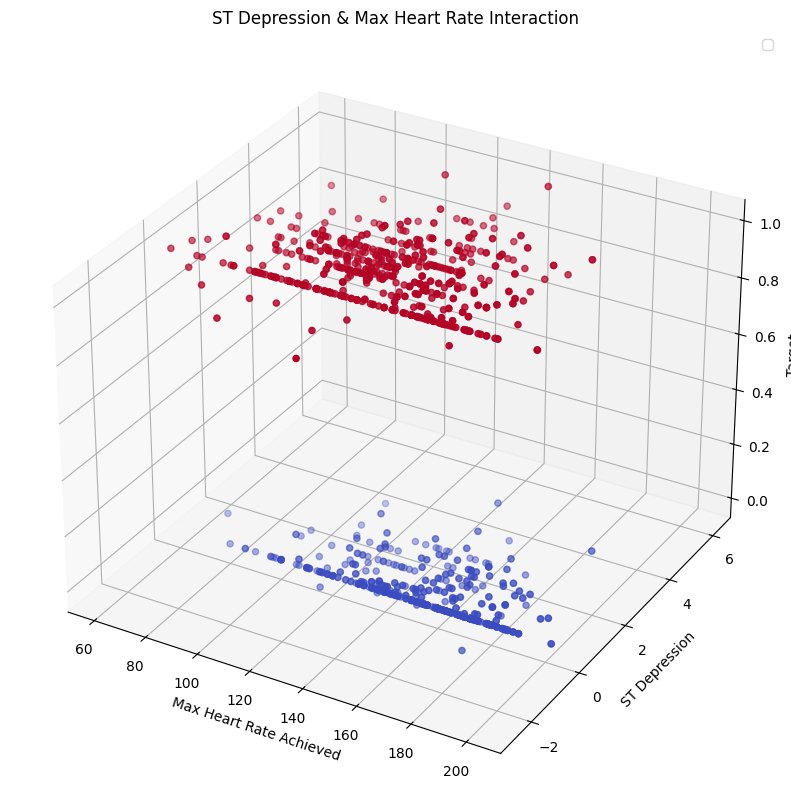

In [11]:
# ST Depression & Max Heart Rate 3D Interaction
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['max_heart_rate_achieved'], data['st_depression'], data['target'], c=data['target'], cmap='coolwarm')
ax.set_xlabel('Max Heart Rate Achieved')
ax.set_ylabel('ST Depression')
ax.set_zlabel('Target')
ax.set_title('ST Depression & Max Heart Rate Interaction')
ax.legend()
plt.show()

<h4> Inference:

- Patients at risk for heart disease (target = 1) tend to have lower maximum heart rates and higher ST depression levels compared to those at no risk.
- The scatter distribution indicates a negative trend between ST depression and max heart rate for patients at risk.


<h3> 4. Correlation Among Features

<h4> (a) Feature Correlation Dendrogram

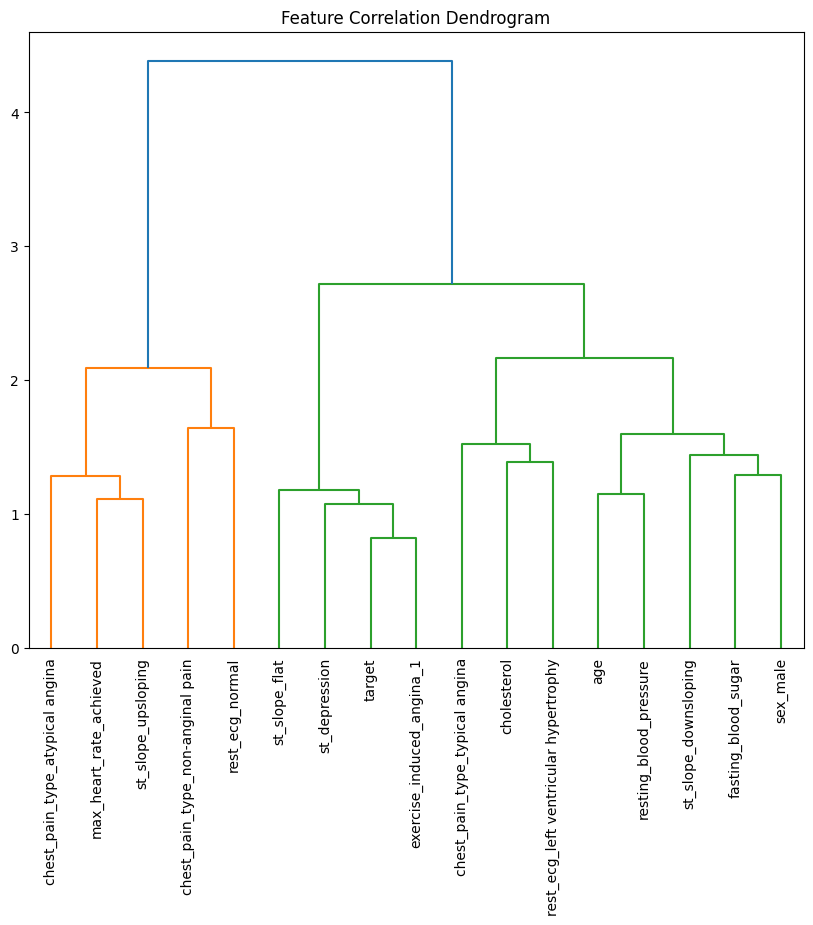

In [12]:
# Encode categorical variables if needed
data_encoded = data.copy()

# Convert categorical columns to numerical (if not already done)
categorical_cols = ['chest_pain_type', 'sex', 'rest_ecg', 'exercise_induced_angina', 'st_slope']
data_encoded = pd.get_dummies(data_encoded, columns=categorical_cols, drop_first=True)

# Compute correlation matrix (only numerical features now)
correlation_matrix = data_encoded.corr()

# Generate linkage for hierarchical clustering
linkage = hierarchy.linkage(correlation_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
hierarchy.dendrogram(linkage, labels=correlation_matrix.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Feature Correlation Dendrogram')
plt.show()

<h4> Feature Correlation Dendrogram:

- Highly correlated features such as cholesterol and resting_blood_pressure cluster together, suggesting potential redundancy.
- This hierarchical clustering highlights groups of interrelated features.

<h4> (b) Feature Pairwise Heatmap

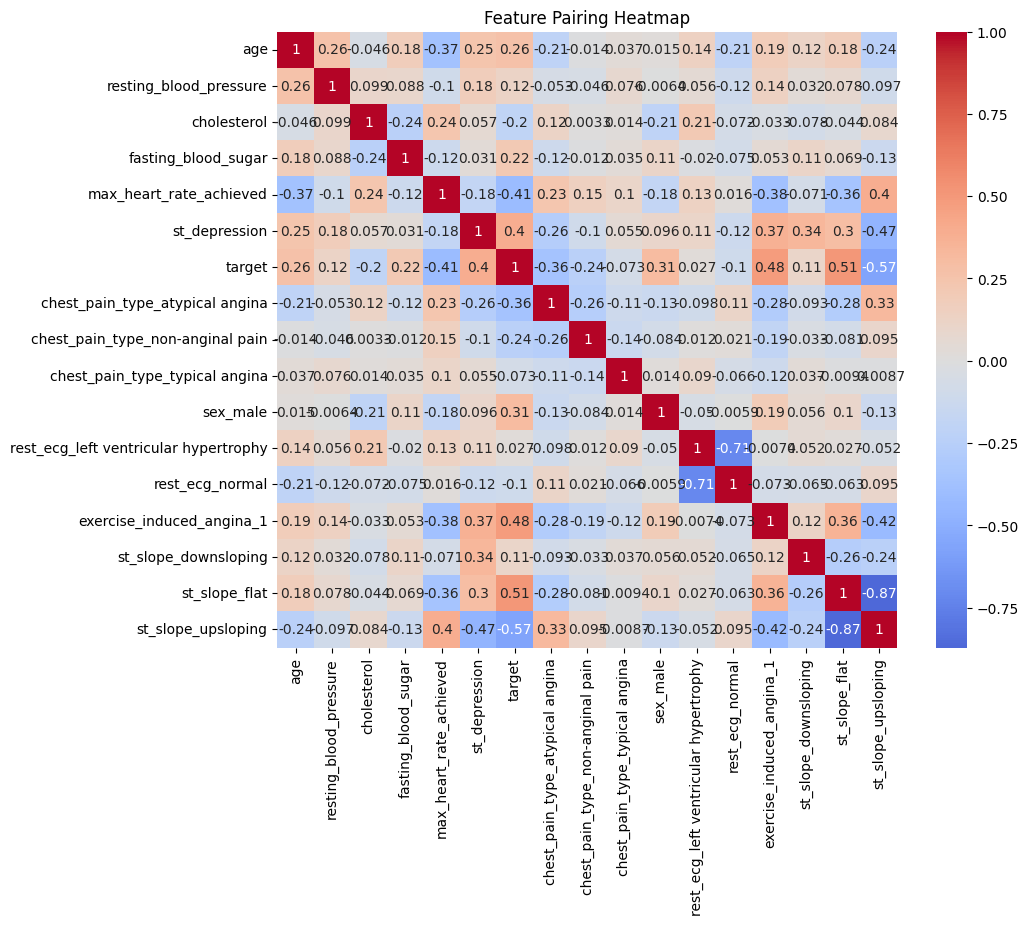

In [13]:
# Feature Pairing Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Pairing Heatmap')
plt.show()

<h4> Feature Pairing Heatmap:

- Features like age and max_heart_rate_achieved show low correlations with most other features, indicating they may capture unique aspects of the data.
- ST depression and ST slope exhibit moderate correlation, which may complement each other in modeling.

<h3> 5. Outlier Detection and Removal using z-score

In [14]:
features = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope']
z_scores = stats.zscore(data_raw[features])

In [23]:
z_scores

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope
0,-1.466728,0.555995,-1.318351,0.427328,0.775674,-0.520929,1.265039,-0.795219,-0.849792,-1.023217
1,-0.504600,-1.798576,-0.248932,1.516587,-0.299512,-0.520929,0.637758,-0.795219,0.071119,0.615583
2,-1.787437,0.555995,-1.318351,-0.117301,0.716489,-0.520929,-1.636136,-0.795219,-0.849792,-1.023217
3,-0.611503,-1.798576,0.820487,0.318402,0.035867,-0.520929,-1.244085,1.257515,0.531575,0.615583
4,0.029915,0.555995,-0.248932,0.971958,-0.151550,-0.520929,-0.695214,-0.795219,-0.849792,-1.023217
...,...,...,...,...,...,...,...,...,...,...
1185,-0.932213,0.555995,-2.387770,-1.206560,0.529071,-0.520929,-0.303164,-0.795219,0.255301,0.615583
1186,1.526558,0.555995,0.820487,0.645180,-0.171279,1.919646,0.049682,-0.795219,2.281307,0.615583
1187,0.350624,0.555995,0.820487,-0.117301,-0.782852,-0.520929,-0.969650,1.257515,0.255301,0.615583
1188,0.350624,-1.798576,-1.318351,-0.117301,0.252877,-0.520929,1.343449,-0.795219,-0.849792,0.615583


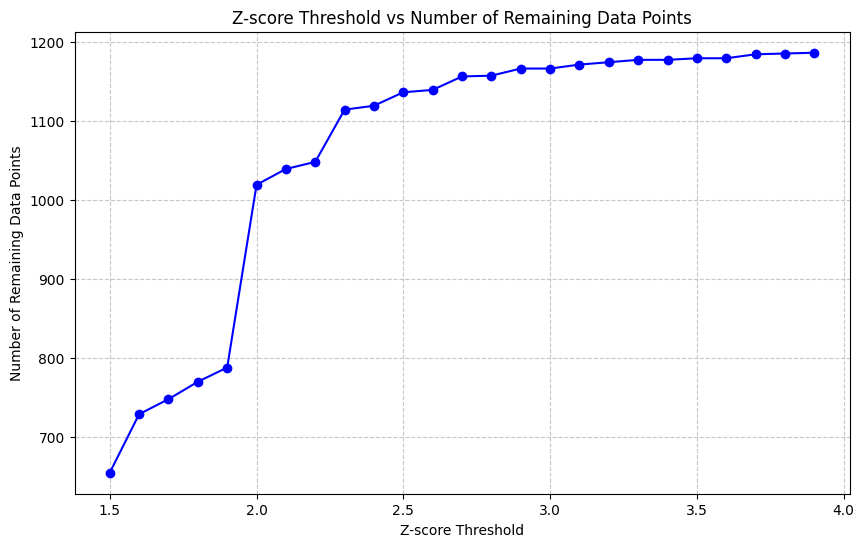

In [15]:
thresholds = np.arange(1.5, 4.0, 0.1)
remaining_data_points = [(z_scores < t).all(axis=1).sum() for t in thresholds]
# Plot Threshold Evaluation
plt.figure(figsize=(10, 6))
plt.plot(thresholds, remaining_data_points, marker='o', color='b')
plt.title('Z-score Threshold vs Number of Remaining Data Points')
plt.xlabel('Z-score Threshold')
plt.ylabel('Number of Remaining Data Points')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<h4> We chose a Z-score threshold of 2.3 because the graph exhibits a noticeable stabilization after this point. Prior to a Z-score of 2.3, there is a steep increase in the number of retained data points as the threshold rises, indicating significant outlier removal. Beyond 2.3, the rate of increase flattens, suggesting diminishing returns in terms of data retention while ensuring that most outliers are removed effectively.

In [16]:
threshold = 2.3  # Suggested threshold from the notebook
outliers = (np.abs(z_scores) < threshold).all(axis=1)
data_clean = data_raw[outliers]

In [17]:
print('Original data size:', data.shape)
print('Cleaned data size:', data_clean.shape)

Original data size: (1190, 12)
Cleaned data size: (1027, 12)


<h2> Predictive Modelling

<h3> Training and Evaluation : With Outliers

In [29]:
X = data_raw.drop(['target'],axis=1)
y = data_raw['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

rf = RandomForestClassifier(criterion='entropy',n_estimators=80, max_depth = 10)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

#Get Training and testing accuracy score and print the classification report
print("Training accuracy: ", rf.score(X_train, y_train))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("\n\nTesting accuracy: ", rf.score(X_test, y_test))
print("Classification Report: \n", classification_report(y_test, y_pred))


Training accuracy:  0.9873949579831933
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.89       112
           1       0.89      0.93      0.91       126

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



Testing accuracy:  0.9033613445378151
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.89       112
           1       0.89      0.93      0.91       126

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



<h3> Training and Evaluation : Without Outliers

In [30]:
X = data_clean.drop(['target'],axis=1)
y = data_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

rf = RandomForestClassifier(criterion='entropy',n_estimators=80, max_depth = 10)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

#Get Training and testing accuracy score and print the classification report
print("Training accuracy: ", rf.score(X_train, y_train))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("\n\nTesting accuracy: ", rf.score(X_test, y_test))
print("Classification Report: \n", classification_report(y_test, y_pred))


Training accuracy:  0.9939098660170523
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        99
           1       0.93      0.97      0.95       107

    accuracy                           0.95       206
   macro avg       0.95      0.95      0.95       206
weighted avg       0.95      0.95      0.95       206



Testing accuracy:  0.9466019417475728
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        99
           1       0.93      0.97      0.95       107

    accuracy                           0.95       206
   macro avg       0.95      0.95      0.95       206
weighted avg       0.95      0.95      0.95       206



<h3> Feature Importance

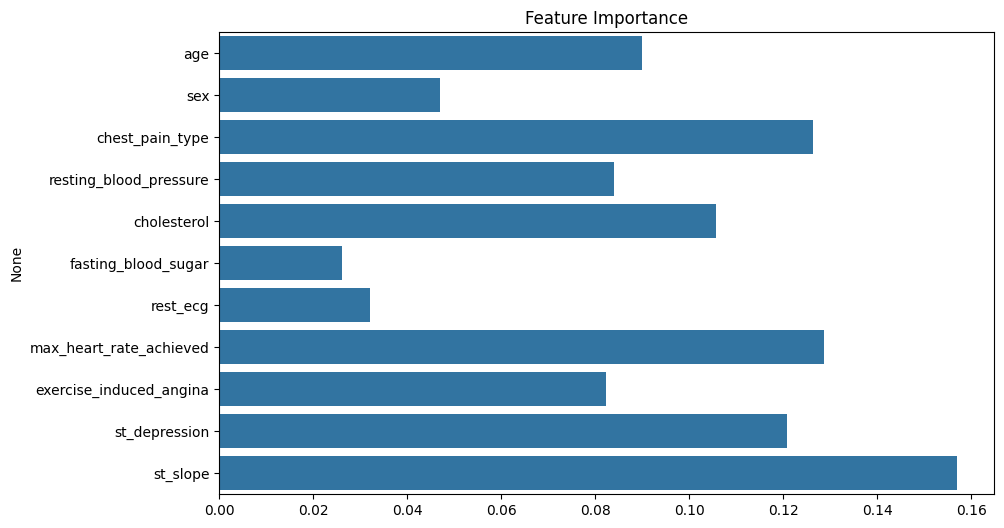

In [22]:
#Find feature importance
feature_importance = rf.feature_importances_

#Print graph of feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.show()

<h4> Top Features: st_slope, st_depression, and max_heart_rate_achieved have the highest importance scores.
cholesterol and age also show moderate importance, while features like fasting_blood_sugar and rest_ecg are less significant.
st_slope has the highest importance, suggesting a strong predictive relationship with the target.